<a href="https://colab.research.google.com/github/Vasanta2002/Sprint_2/blob/main/Sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explain the Purpose of a t-test and Identify Applications

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The normal distribution')

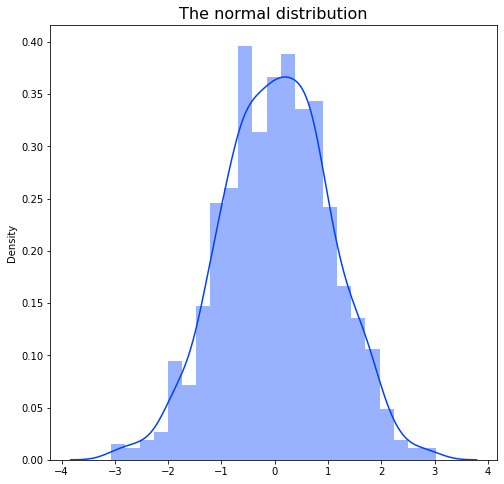

In [ ]:
import numpy as np

# The mean of a normal distribution can be any value
# (we're using 0 for plotting nicely and to see the symmetry)
mean = 0

# The width of the normal distribution is set by the standard deviation
sigma = 1 

# Create a sample drawn from the normal distribution
sample = np.random.normal(loc=mean, scale=sigma, size=1000)

# Import plotting libaries
import seaborn as sns
import matplotlib.pyplot as plt

# The 'seaborn' style sheet has nice defaults
plt.style.use('seaborn-bright')

# Create the fig and axes object and plot
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(sample)
ax.set_title('The normal distribution', fontsize=16)

The t-values and t-tests

In some situations, we draw a sample from a population where we don't know that population's mean. For example, in the normal distribution plotted above, we set the mean equal to one. 

In this case, we need to substitute something else to compare to: we can use the sample's mean. When we use the mean of the sample and not the mean of the population from which we drew the sample, we calculate the t-value. So it is similar to the z-score; instead, we're using the mean of the sample.

A t-test is based on a t-value. When you perform a t-test for a single study, you obtain a single t-value. If you drew lots of random samples of the same size from the same population, performed a t-test each time (to obtain a t-value), you could then plot a distribution of all the t-values. This type of distribution is called a sampling distribution and, in this case, a t-distribution.

Thanks to math and statisticians, the properties of t-distributions are well understood, so we can plot them without having to draw samples, calculate the t-value, etc. A specific t-distribution is defined by its degrees of freedom (dof), with a sample size-1. So there is a whole "family" of t-distributions for every sample size. For large samples size (n > 120), the shape of the t-distribution is almost identical to the normal di

In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the t-distributions
t_df10 = np.random.standard_t(df=10, size=100)
t_df100 = np.random.standard_t(df=100, size=1000)
t_df1000 = np.random.standard_t(df=1000, size=10000)

# Create the normal distribution
s = np.random.normal(size=10000)

# Create the figure and axes objects and plots
fig, ax = plt.subplots(1)

# Plot t-distributions
ax = sns.kdeplot(t_df10, color='r');
ax = sns.kdeplot(t_df100, color='y');
ax = sns.kdeplot(t_df1000, color='b');

# Plot normal distributions
sns.kdeplot(s, color='k');


#Set Up and Run a one-sample or two-sample t-test

In [ ]:
# Import the stats module
from scipy import stats

# Generate the random test scores with the specified mean, std, and sample size
rvs = stats.norm.rvs(loc=69, scale=6.5, size=50, random_state=42)

# Display the test scores, as a check
rvs

# Check the sample mean and std
print('The mean of the sample: ', rvs.mean())
print('The standard deviation of the sample: ', rvs.std())

# Calculate the t value using the ttest_1samp 
stats.ttest_1samp(rvs, popmean=72)

The mean of the sample:  67.53441961583509
The standard deviation of the sample:  6.00785209617076


Ttest_1sampResult(statistic=-5.2030346601039055, pvalue=3.841987344207577e-06)

In [ ]:
# Import the library
import numpy as np

# Calculate the t-value
tstatistic = (67.53-72)/(6.01/np.sqrt(50))
print('The t-statistic is: ', tstatistic)

The t-statistic is:  -5.259180219473988


In [ ]:
# Import the stats module
from scipy import stats

# Generate the random test scores with the specified mean, std, and sample size
rvs1 = stats.norm.rvs(loc=69, scale=7.5, size=80, random_state=50)

# Display the test scores, as a check
rvs1

# Check the sample mean and std
print('The mean of the sample: ', rvs1.mean())
print('The standard deviation of the sample: ', rvs1.std())

# Calculate the t value using the ttest_1samp 
stats.ttest_1samp(rvs1, popmean=72)

The mean of the sample:  70.03380209170375
The standard deviation of the sample:  7.307925777765827


Ttest_1sampResult(statistic=-2.3913692890842504, pvalue=0.019163724240099506)

#Set Up and Run a Two-sample Independent t-test

In [ ]:
For the two-sample t-tests, it's more challenging to calculate the t-value by hand; the equation is a little longer, 
and it's more involved when the sizes and variance/standard deviation are different for the two samples. 
So we'll use the power of Python!

Calculate with NumPy and SciPy
Here are the parameters we are using for our two-sample t-test:

cardio-based program: mean=69 bpm, std=6.5 bpm
yoga-based program: mean=71 bpm, std=7.3 bpm
Let's use some NumPy and SciPy tools to generate a normal distribution with the specified parameters. 
We have the sample means, sample standard deviations, and population mean (72). 
We'll create a distribution of random variables with the given mean (loc) and standard deviation (*scale).

In [ ]:
# Import the libraries
import numpy as np
from scipy import stats
np.random.seed(42)

# Generate the random variables with the specified mean, std, and sample size
rvs1 = stats.norm.rvs(loc=5, scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5, scale=20, size=500)

# Calculate the t statistic for these two sample populations
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.5805372888262401, pvalue=0.5616834058141496)

# Chi-squares

In [ ]:
# Import the libraries
import numpy as np
from scipy.stats import chi2_contingency

# Create the table using as a NumPy array
table = np.array([[200, 290], [400, 910]])

# Print out the table to double-check
print('Contingency table: \n', table)

Contingency table: 
 [[200 290]
 [400 910]]


In [ ]:
# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(table, correction=False)

# Print out the stats in a nice format
print('Expected values: \n ', expected.round(2))
print(f'The chi square statistics is: {stat:.3f}')
print(f'The p value is: {p:.6f}')

Expected values: 
  [[163.33 326.67]
 [436.67 873.33]]
The chi square statistics is: 16.965
The p value is: 0.000038
